# K-means

## Data

Use the [World Value Survey](http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp) datafiles and corresponding questionaire and codebook files to understand what is in the data.

## Overarching research question

What kind of responder groups can emerge from survey responders and do they correspond to nationalities?
* Choose some relevant measurements
* Run analysis
* Interprent

## Tools

[Kmeans](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/kmeans) is inbuild to R.

In [1]:
## create new data matrix for k-means analysis

selected_keys <- c('V4', 'V5', 'V6', 'V7', 'V8', 'V9')

full_data <- read.csv('data/wvs.csv')

data <- full_data[,selected_keys ]

print( nrow( data ) )

[1] 89565


In [2]:
kmeans_results <- kmeans( data, centers = 10 )

clustering_results <- kmeans_results$cluster

## number of responders per cluster

table( clustering_results )

clustering_results
    1     2     3     4     5     6     7     8     9    10 
23710 10169   599   510 21067   283   495 19603 12371   758 

Now we have created a **ten cluster** approach.
How do we know if it is any good?

What would be different if we create a **five cluster** model instead?

Let's examine the mean values per each of the identified cluster.

In [3]:
aggregate(data, by=list(clustering_results), FUN=mean)

Group.1,V4,V5,V6,V7,V8,V9
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0571911,1.854618,2.0940953,3.504935,1.1840995,1.2206242
2,1.1721900,1.907267,2.2541056,3.030878,3.1386567,2.0901760
3,1.0884808,1.424040,0.5075125,-1.223706,0.5943239,0.1919866
4,1.0686275,1.733333,1.6411765,2.564706,-3.9196078,2.2450980
5,1.0290502,1.124318,1.2555656,1.793706,1.1909147,1.2546162
6,-0.2508834,-1.332155,-1.5300353,-1.484099,-1.4452297,-1.1413428
7,1.0949495,1.694949,-1.4262626,2.898990,1.3636364,1.6989899
8,1.1355915,1.611998,1.7714125,2.809927,1.5057899,3.4519716
9,1.1049228,2.102821,2.4382831,1.714089,1.2857489,1.3900251


## Task

* Run the above code and explain to yourself what is done.
* Choose suitable variables using the codebook and your understanding and intuition.
* Modify the number of clusters and examine how results change.

## Looking inside K-means

Often we prefer to use some data-driven approaches to identify the best number of clusters. One way to achieve this is to use the [elbow_ method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)), where we visually inspect the best number of topics. Other tools exists as well, such as the [Silhouette method](https://en.wikipedia.org/wiki/Silhouette_(clustering)). Elbow is simple, but not always that clear and other methods are preferred. However, it is easy to understand.

The Elbow-method measures the distance clusters' items have to the centroid (sum of squared errors, sse). It can range from 0 (all items in the clusters are at the same point as its centroid) to positive infinity (nodes are all over the place). When numer or clusters (k) is increased, it decreases SSE; but this is a balancing act: how do you balance between more clusters and additional complexity and most explainability?

In [4]:
sse <- c()

for(k in 2:10) {
    result <- kmeans( data, centers = k )
    sse <- c( sse, result$tot.withinss ) ## this is slow in R, but when doing a list of ten items it is OK.
}

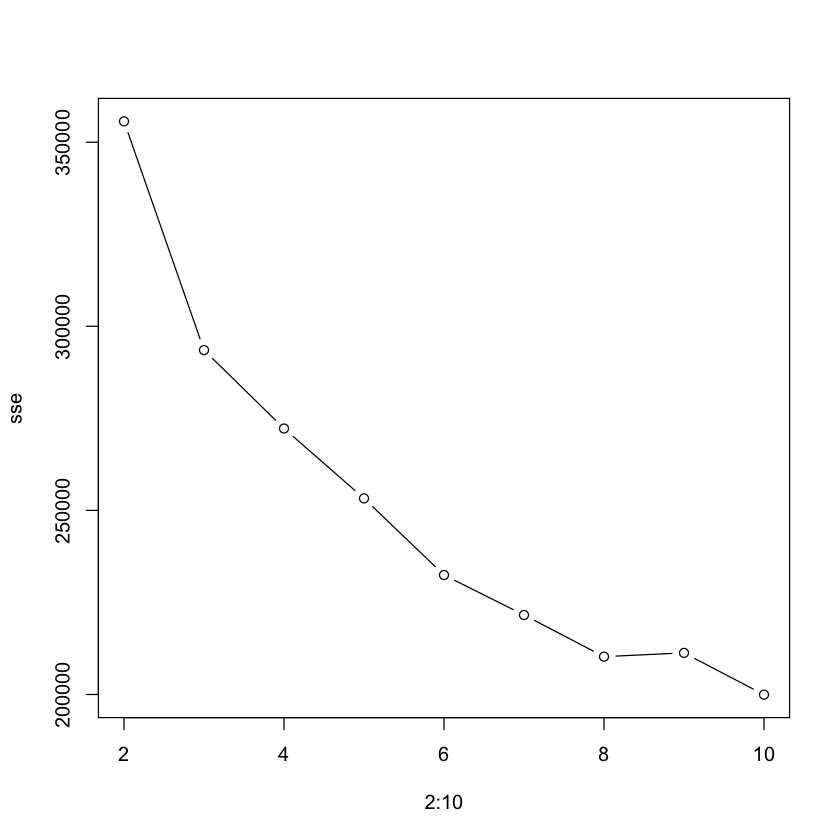

In [5]:
plot( 2:10, sse, type="b")

## Tasks

* Draw three different k-means clusterings with centroids and related values and organize them by their SSE.
* Use the elbow method to optimize your model.
* What similarities can you find between k-means and factor analysis?
* How does k-means differ from factor analysis? 